In [7]:
require(ggplot2)

Loading required package: ggplot2


In [1]:
# load data from file
data = read.csv("~/research_data/mozilla_voice_comparison/ppt_data.csv")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))
    

In [3]:
group_names.voice = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

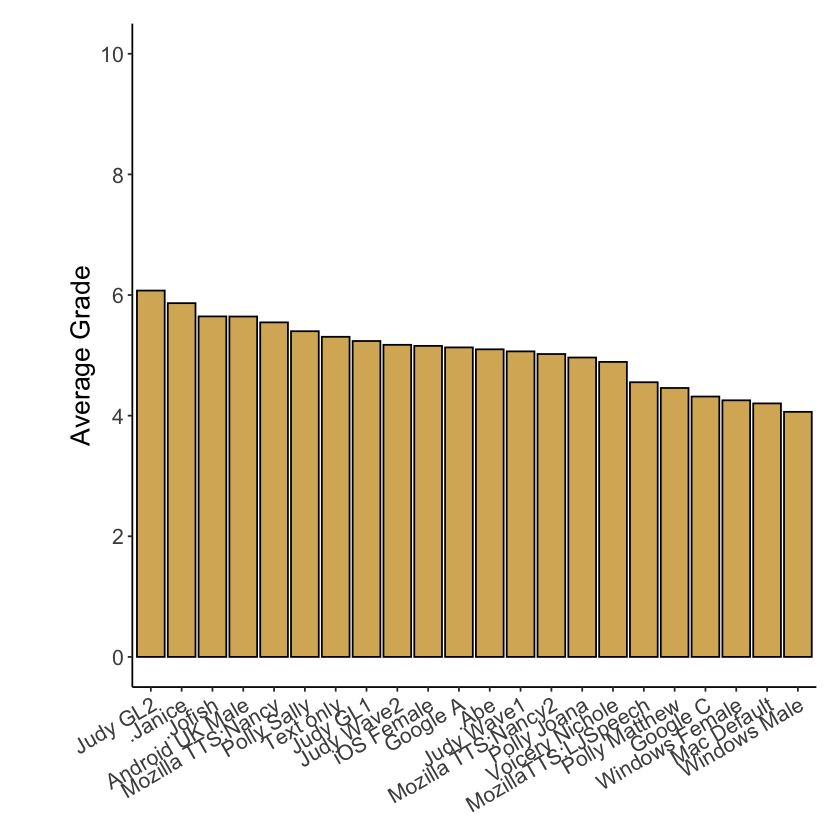

In [11]:
temp = data
temp = aggregate(grade ~ voice, data=temp, FUN = "mean")
temp = subset(temp, voice %in% names(group_names.voice))
#temp = merge(temp, group_names.voice.type, by.x='voice', by.y=0)

ggplot(temp, aes(x = reorder(voice,-grade), y = grade, fill="",
                 label = voice)) +
  geom_bar(stat="identity", color = "black") + 
  theme_classic() +
  labs(y = "Average Grade") +
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=16),
        axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_text(size = ),
        axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "none") +
        guides(fill = guide_legend(title = "Voice Type")) +
  scale_fill_brewer(palette = "BrBG", direction = -1) +
  scale_y_continuous(limits=c(0,10),breaks=seq(0,10,2))

ggsave("~/Desktop/comprehension_9-13-19.pdf",height=4,width=7)